# Photo Analyzer
- Author: Andrew Eng
- Base Code: https://github.com/dingkeyan93/Intrinsic-Image-Popularity
- Fork: https://github.com/acklab-ae/Intrinsic-Image-Popularity

In [135]:
import argparse
import torch
import torchvision.models
import torchvision.transforms as transforms
from PIL import Image
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
import os

# Score photo by popularity

The following code was modified to take in a folder of pictures and process them vs. doing it one by one.

In [136]:
def prepare_image(image):

    if image.mode != 'RGB':
        image = image.convert("RGB")
    Transform = transforms.Compose([
            transforms.Resize([224,224]),      
            transforms.ToTensor(),
            ])
    image = Transform(image)   
    image = image.unsqueeze(0)
    
    return image.to(device)

def predict(image, model, file, log):
    file = file
    image = prepare_image(image)
    
    with torch.no_grad():
        preds = model(image)
    score = preds.item()
    
    with open(log,'a') as f:
        f.write(f'\n{file},{round(score,2)}')
    f.close()
    
def process(x, y, log):
    path = x
    file = y
    image_path = path + file
    #print(f'{file}')
    image = Image.open(image_path)
    model = torchvision.models.resnet50()
    # model.avgpool = nn.AdaptiveAvgPool2d(1) # for any size of the input
    model.fc = torch.nn.Linear(in_features=2048, out_features=1)
    model.load_state_dict(torch.load('model/model-resnet50.pth', map_location=device)) 
    model.eval().to(device)
    predict(image, model, image_path, log)

# Analyze folder of pictures

In [137]:
image_location = 'images/'
log = 'images.log'

with open(log,'w') as f:
    f.write('image,score')
f.close()

list_of_files = os.listdir(image_location)
count = 0

# TQDM is used as a progress bar for image processing
from tqdm import tqdm
import time

count = 0
for i in tqdm(list_of_files):
    process(image_location,list_of_files[count],log)
    count +=1

100%|██████████| 6/6 [00:07<00:00,  1.30s/it]


# Pandas DataFrame for Image Analysis

In [138]:
import pandas as pd

In [139]:
df = pd.read_csv('images.log')

In [140]:
df.head()

,image,score
0,images/5.jpg,4.45
1,images/4.jpg,5.22
2,images/2.jpg,1.86
3,images/1.jpg,3.65
4,images/3.jpg,1.59


In [148]:
df.sort_values(by=['score'], ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)

In [149]:
df.head()

,image,score
0,images/4.jpg,5.22
1,images/5.jpg,4.45
2,images/1.jpg,3.65
3,images/0.jpg,3.30
4,images/2.jpg,1.86


Highest scored photo


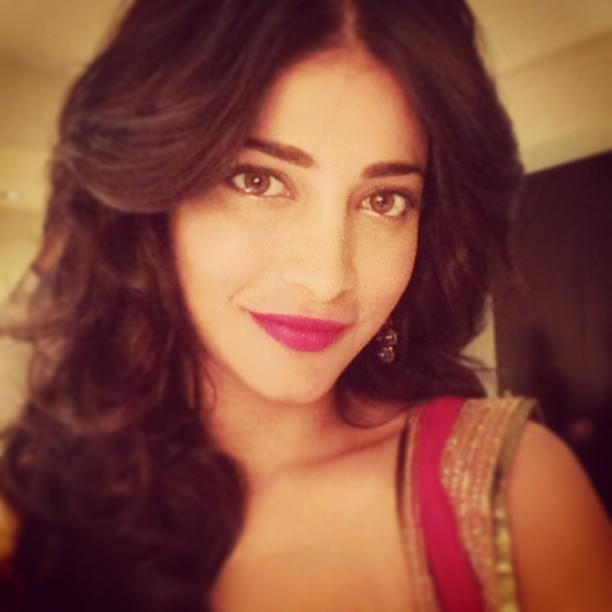

In [170]:
print('Highest scored photo')
from IPython.display import Image
Image(filename=df['image'][0])

Lowest Scored Photo


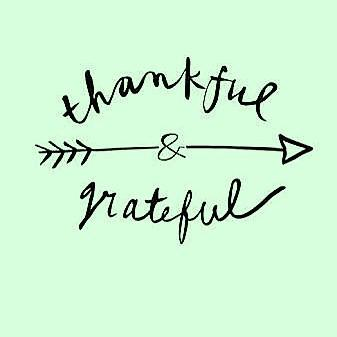

In [171]:
print('Lowest Scored Photo')
Image(filename=df['image'][len(df)-1])

# Facial Recognition

# Background Object Classification

# Location Recognition